In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from particle import literals as lp

from HNL_MC import *
from utils_limits import *

In [3]:
channels = [r'$\mu\pi$',
            r'$e^-\pi^+$',
            r'$e^+\pi^-$',
            r'$\mu^+\mu^-$',
            r'$e^+e^-$',]

stop_index_fit = 14

eff_fit = np.zeros(shape=(len(masses_all), 24, 10))

<ipython-input-4-1e28e1873d5c>:2: RuntimeWarning: invalid value encountered in true_divide
  plt.scatter(masses_t2k,eff[:, 0, i]/eff[:, 4, i])
<ipython-input-4-1e28e1873d5c>:3: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(masses_t2k[:stop_index_fit],eff_fit[:stop_index_fit, 0, i]/eff_fit[:stop_index_fit, 4, i])


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: computer modern roman


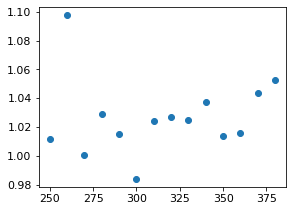

In [4]:
i=0
plt.scatter(masses_t2k,eff[:, 0, i]/eff[:, 4, i])
plt.plot(masses_t2k[:stop_index_fit],eff_fit[:stop_index_fit, 0, i]/eff_fit[:stop_index_fit, 4, i])

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: computer modern roman
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: computer modern roman


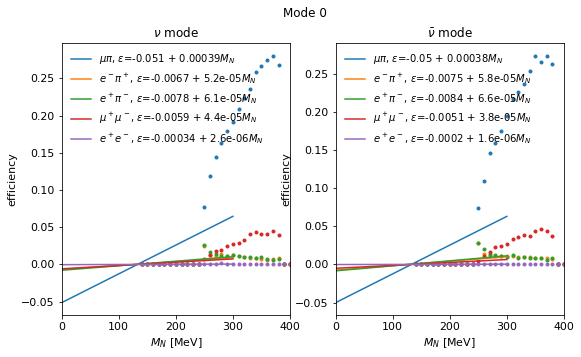

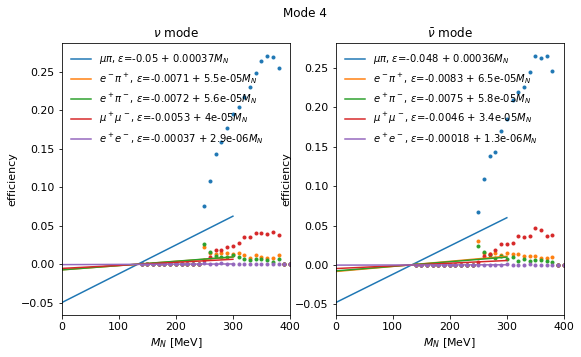

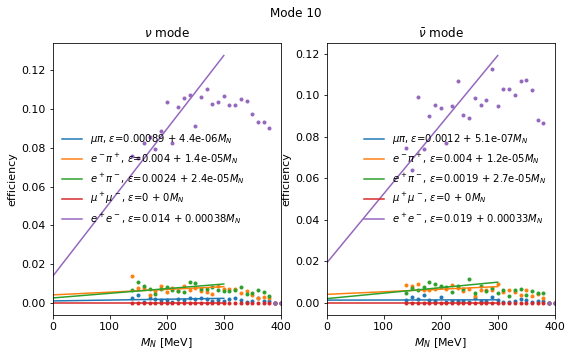

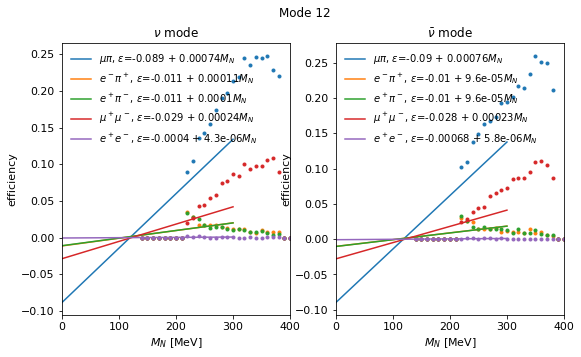

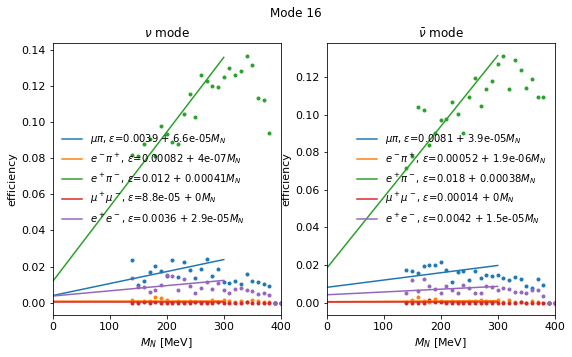

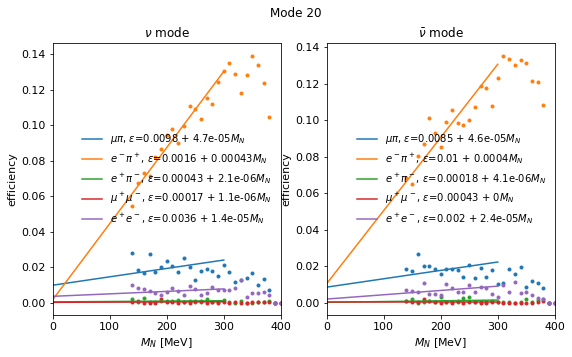

In [5]:
for mode in modes_majorana:
    fig, axs = plt.subplots(1, 2, figsize=(9, 5))

    axs[0].plot(masses_t2k, eff[:, mode, :5], '.')
    axs[1].plot(masses_t2k, eff[:, mode, 5:], '.')

    for i in range(10):
        if i < 5:
            this_ax = axs[0]
        else:
            this_ax = axs[1]
        poly = np.polynomial.polynomial.Polynomial.fit(np.append(0.0,masses_t2k[:stop_index_fit]), 
                                                       np.append(0.0,eff[:stop_index_fit, mode, i]), 
                                                       deg=1)
        if (poly(1)-poly(0)) < 0:
            poly = np.polynomial.polynomial.Polynomial.fit(np.append(0.0,masses_t2k[:stop_index_fit]), 
                                                           np.append(0.0,eff[:stop_index_fit, mode, i]), 
                                                           deg=0)
        this_ax.plot(np.linspace(0, 300, 15), 
                     poly(np.linspace(0, 300, 15)), 
                     label=f'{channels[i%5]}, $\epsilon$={poly(0):.2g} + {(poly(1)-poly(0)):.2g}$M_N$',
                     color=f'C{i%5}')

        eff_fit[:, mode, i] = poly(masses_all)

    for i in range(2):
        axs[i].set_xlim(0, 400)
        axs[i].set_xlabel(r'$M_N$ [MeV]')
        axs[i].set_ylabel('efficiency')
        axs[i].legend(frameon=False)
    plt.suptitle(f'Mode {mode}')
    axs[0].set_title(r'$\nu$ mode')
    axs[1].set_title(r'$\bar{\nu}$ mode')
    plt.savefig(f'./plots/efficiencies/mode_{mode}.png', dpi=250, bbox_inches='tight')

/home/nic/Dropbox/Dark_coherent_scattering/stdHNL/HNL_MC/const.py:158: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(kallen(a,b,c))


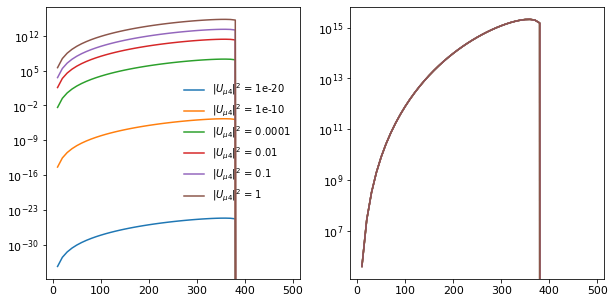

In [6]:
USQRs = [1e-20, 1e-10, 1e-4, 1e-2, 1e-1, 1]
hnl_flux = []
for USQR in USQRs:
    hnl_flux.append([])
    for mass in masses_all:
        hnl_flux[-1].append(hnl_tools.get_event_rate_mode((mass/1000, USQR), 
                                                           modes=['nu_e_e'],
                                                           flavor_struct=[0.0, 1, 0.0], 
                                                           exp_setup=exp.ND280_FHC))
        
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
hnl_flux_np = np.asarray(hnl_flux)
for i, USQR in enumerate(USQRs):
    axs[0].plot(masses_all, hnl_flux_np[i, :, 0], label=r'$|U_{\mu 4}|^2$' + f' = {USQR:.2g}')
    axs[1].plot(masses_all, hnl_flux_np[i, :, 0]/USQR**2, label=r'$|U_{\mu 4}|^2$' + f' = {USQR:.2g}')
axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].legend(frameon=False)

In [7]:
nd280fhc = exp.experiment(exp.ND280_FHC)
hnl_flux = []
for mass in masses_all:
    hnl_flux.append(hnl_tools.get_event_rate_mode((mass/1000, 1), 
                                                  modes=['nu_e_e', 'nu_e_mu', 'mu_pi', 'nu_mu_mu'],
                                                       flavor_struct=[0.0, 1, 0.0], 
                                                       exp_setup=exp.ND280_FHC))
hnl_flux = np.squeeze(np.asarray(hnl_flux))

/home/nic/Dropbox/Dark_coherent_scattering/stdHNL/HNL_MC/const.py:158: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(kallen(a,b,c))


In [8]:
flux_fit_dirac = np.zeros((len(masses_all), flux.shape[1]))
flux_fit_majorana = np.zeros((len(masses_all), flux.shape[1]))

flux_fit_dirac[:, 0] = hnl_flux[:, 2]
flux_fit_dirac[:, 4] = hnl_flux[:, 2]
flux_fit_dirac[:, 10] = hnl_flux[:, 0]
flux_fit_dirac[:, 12] = hnl_flux[:, 3]
flux_fit_dirac[:, 16] = hnl_flux[:, 1]

flux_fit_majorana[:, 0] = hnl_flux[:, 2]
flux_fit_majorana[:, 4] = hnl_flux[:, 2]
flux_fit_majorana[:, 10] = hnl_flux[:, 0]*2
flux_fit_majorana[:, 12] = hnl_flux[:, 3]*2
flux_fit_majorana[:, 16] = hnl_flux[:, 1]
flux_fit_majorana[:, 20] = hnl_flux[:, 1]

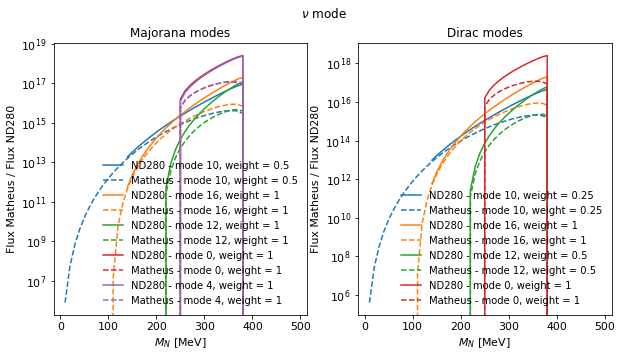

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(r'$\nu$ mode')

for i, (mode, weight) in enumerate(zip([10, 16, 12, 0, 4], [0.5, 1, 1, 1, 1])):
    axs[0].plot(masses_t2k, flux[:, mode]*weight, f'C{i}', label=f'ND280 - mode {mode}, weight = {weight}')
    axs[0].plot(masses_all, flux_fit_majorana[:, mode], f'C{i}--', label=f'Matheus - mode {mode}, weight = {weight}')
    
axs[0].set_title('Majorana modes')

for i, (mode, weight) in enumerate(zip([10, 16, 12, 0], [0.25, 1, 0.5, 1])):
    axs[1].plot(masses_t2k, flux[:, mode]*weight, f'C{i}', label=f'ND280 - mode {mode}, weight = {weight}')
    axs[1].plot(masses_all, flux_fit_dirac[:, mode], f'C{i}--', label=f'Matheus - mode {mode}, weight = {weight}')
axs[1].set_title('Dirac modes')

for ax in axs:
    ax.set_xlabel(r'$M_N$ [MeV]')
    ax.set_ylabel('Flux Matheus / Flux ND280')
    ax.legend(frameon=False)
    ax.set_yscale('log')

<ipython-input-10-577f198d8acc>:5: RuntimeWarning: invalid value encountered in true_divide
  axs[0].plot(masses_t2k, flux_fit_majorana[13:, mode]/(flux[:, mode]*weight), f'C{i}--', label=f'mode {mode}')
<ipython-input-10-577f198d8acc>:5: RuntimeWarning: invalid value encountered in true_divide
  axs[0].plot(masses_t2k, flux_fit_majorana[13:, mode]/(flux[:, mode]*weight), f'C{i}--', label=f'mode {mode}')
<ipython-input-10-577f198d8acc>:5: RuntimeWarning: invalid value encountered in true_divide
  axs[0].plot(masses_t2k, flux_fit_majorana[13:, mode]/(flux[:, mode]*weight), f'C{i}--', label=f'mode {mode}')
<ipython-input-10-577f198d8acc>:5: RuntimeWarning: invalid value encountered in true_divide
  axs[0].plot(masses_t2k, flux_fit_majorana[13:, mode]/(flux[:, mode]*weight), f'C{i}--', label=f'mode {mode}')
<ipython-input-10-577f198d8acc>:5: RuntimeWarning: invalid value encountered in true_divide
  axs[0].plot(masses_t2k, flux_fit_majorana[13:, mode]/(flux[:, mode]*weight), f'C{i}--', la

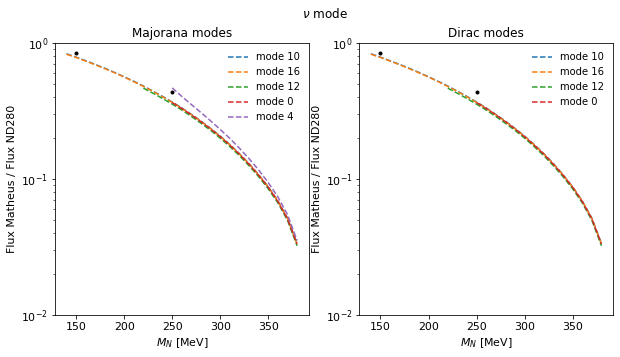

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle(r'$\nu$ mode')

for i, (mode, weight) in enumerate(zip([10, 16, 12, 0, 4], [0.5, 1, 1, 1, 1])):
    axs[0].plot(masses_t2k, flux_fit_majorana[13:, mode]/(flux[:, mode]*weight), f'C{i}--', label=f'mode {mode}')

axs[0].plot([150, 250], [0.85, 0.44], 'k.')
axs[0].set_title('Majorana modes')

for i, (mode, weight) in enumerate(zip([10, 16, 12, 0], [0.25, 1, 0.5, 1])):
    axs[1].plot(masses_t2k, flux_fit_dirac[13:, mode]/(flux[:, mode]*weight), f'C{i}--', label=f'mode {mode}')
axs[1].plot([150, 250], [0.85, 0.44], 'k.')
axs[1].set_title('Dirac modes')

for ax in axs:
    ax.set_xlabel(r'$M_N$ [MeV]')
    ax.set_ylabel('Flux Matheus / Flux ND280')
    ax.legend(frameon=False)
    ax.set_yscale('log')
    ax.set_ylim(1e-2,1)
fig.savefig("plots/ratio_of_T2K_to_matheus.png", dpi=400)

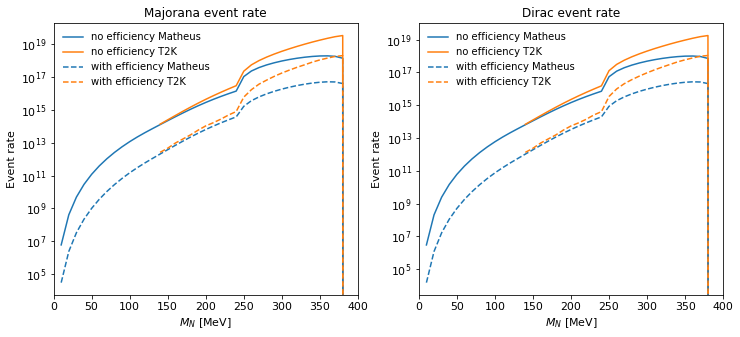

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
pot_factor = (6.29+12.34)/12.34
axs[0].set_title('Majorana event rate')
axs[1].set_title('Dirac event rate')
    
axs[0].plot(masses_all, pot_factor*n_events_T2K(np.ones(eff_fit.shape), flux_fit_majorana, 
                                                          channels=np.arange(5), 
                                                          modes=modes_majorana, 
                                                          mode_weights=np.ones(len(modes_majorana))),
            'C0-', label=r'no efficiency Matheus')
axs[0].plot(masses_t2k, n_events_T2K(np.ones(eff.shape), flux, 
                                                          channels=np.arange(10), 
                                                          modes=modes_majorana, 
                                                          mode_weights=weights_modes_majorana),
            'C1-', label=r'no efficiency T2K')
axs[0].plot(masses_all, pot_factor*n_events_T2K(eff_fit, flux_fit_majorana, 
                                                          channels=np.arange(5), 
                                                          modes=modes_majorana, 
                                                          mode_weights=np.ones(len(modes_majorana))),
            'C0--', label=r'with efficiency Matheus')
axs[0].plot(masses_t2k, n_events_T2K(eff, flux, 
                                                          channels=np.arange(10), 
                                                          modes=modes_majorana, 
                                                          mode_weights=weights_modes_majorana),
            'C1--', label=r'with efficiency T2K')



axs[1].plot(masses_all, pot_factor*n_events_T2K(np.ones(eff_fit.shape), flux_fit_dirac, 
                                                          channels=np.arange(5), 
                                                          modes=modes_dirac, 
                                                          mode_weights=np.ones(len(modes_dirac))),
            'C0-', label=r'no efficiency Matheus')
axs[1].plot(masses_t2k, n_events_T2K(np.ones(eff.shape), flux, 
                                                          channels=np.arange(10), 
                                                          modes=modes_dirac, 
                                                          mode_weights=weights_modes_dirac),
            'C1-', label=r'no efficiency T2K')
axs[1].plot(masses_all, pot_factor*n_events_T2K(eff_fit, flux_fit_dirac, 
                                                          channels=np.arange(5), 
                                                          modes=modes_dirac, 
                                                          mode_weights=np.ones(len(modes_dirac))),
            'C0--', label=r'with efficiency Matheus')
axs[1].plot(masses_t2k, n_events_T2K(eff, flux, 
                                                          channels=np.arange(10), 
                                                          modes=modes_dirac, 
                                                          mode_weights=weights_modes_dirac),
            'C1--', label=r'with efficiency T2K')

for ax in axs:
    ax.set_yscale('log')
    ax.set_xlabel(r'$M_N$ [MeV]')
    ax.set_ylabel(r'Event rate')
    ax.legend(frameon=False)
#     ax.set_ylim(1e-9, 1e-6)
    ax.set_xlim(0, 400)

/home/nic/Dropbox/Dark_coherent_scattering/stdHNL/utils_limits.py:27: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta
/home/nic/Dropbox/Dark_coherent_scattering/stdHNL/utils_limits.py:27: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta
/home/nic/Dropbox/Dark_coherent_scattering/stdHNL/utils_limits.py:27: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta
/home/nic/Dropbox/Dark_coherent_scattering/stdHNL/utils_limits.py:27: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta
/home/nic/Dropbox/Dark_coherent_scattering/stdHNL/utils_limits.py:27: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta
/home/nic/Dropbox/Dark_coherent_scattering/stdHNL/utils_limits.py:27: RuntimeWarning: invalid value encountered in true_divide
  return erfinv(cl * erf(eta)) / eta


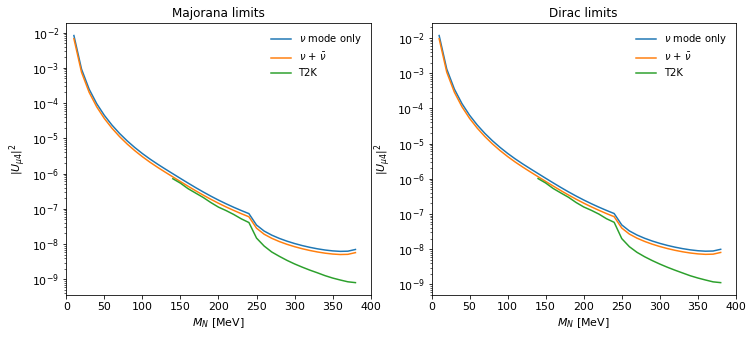

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
pot_factor = (6.29+12.34)/12.34
axs[0].set_title('Majorana limits')
axs[1].set_title('Dirac limits')
    
axs[0].plot(masses_all, bayesian_upper_limit(n_events_T2K(eff_fit, flux_fit_majorana, 
                                                          channels=np.arange(5), 
                                                          modes=modes_majorana, 
                                                          mode_weights=np.ones(len(modes_majorana)))),
            label=r'$\nu$ mode only')

axs[0].plot(masses_all, bayesian_upper_limit(pot_factor*n_events_T2K(eff_fit, flux_fit_majorana, 
                                                          channels=np.arange(5), 
                                                          modes=modes_majorana, 
                                                          mode_weights=np.ones(len(modes_majorana)))),
            label=r'$\nu$ + $\bar{\nu}}$')

axs[0].plot(masses_t2k, bayesian_upper_limit(n_events_T2K(eff, flux, 
                                                          channels=np.arange(10), 
                                                          modes=modes_majorana, 
                                                          mode_weights=weights_modes_majorana)),
            label=r'T2K ')

axs[1].plot(masses_all, bayesian_upper_limit(n_events_T2K(eff_fit, flux_fit_dirac, 
                                                          channels=np.arange(5), 
                                                          modes=modes_dirac, 
                                                          mode_weights=np.ones(len(modes_dirac)))),
            label=r'$\nu$ mode only')

axs[1].plot(masses_all, bayesian_upper_limit(pot_factor*n_events_T2K(eff_fit, flux_fit_dirac, 
                                                          channels=np.arange(5), 
                                                          modes=modes_dirac, 
                                                          mode_weights=np.ones(len(modes_dirac)))),
            label=r'$\nu$ + $\bar{\nu}}$')

axs[1].plot(masses_t2k, bayesian_upper_limit(n_events_T2K(eff, flux, 
                                                          channels=np.arange(10), 
                                                          modes=modes_dirac, 
                                                          mode_weights=weights_modes_dirac)),
            label=r'T2K')

for ax in axs:
    ax.set_yscale('log')
    ax.set_xlabel(r'$M_N$ [MeV]')
    ax.set_ylabel(r'$|U_{\mu 4}|^2$')
    ax.legend(frameon=False)
    ax.set_xlim(0, 400)